In [30]:
#!/usr/bin/env python
# coding: utf-8

# In[4]:


import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# In[5]:


pd.set_option("display.max_rows", None)


# In[6]:

# Get Current Directory
import os
os.getcwd()

'C:\\Risk_WF\\Model_Files\\Paste_Input_File_Here'

In [31]:
# In[7]:


os.chdir('C:\\Risk_WF\\Model_Files\\Training_Data')

current_taz_data_3 = gpd.read_file(r'ModelTaz.shp')

current_taz_data_2 = gpd.read_file(r'TAZ_By_LY_WF.shp')

current_taz_data = pd.read_excel(r'TAZ_By_LY_WF_excel_2.xlsx')

In [32]:
current_taz_data_3.head()

,FID_,Model_TAZ,Coun_Name,MPO,Acres,Area_Type,PDC,TADCE,MPO_1,TOPOP_17,...,OF,IND,Other,AG,FO,PA,Parcel_ACR,Shape_Leng,Shape_Area,geometry
0,847,951.0,Chesterfield,Tri-Cities,627.554376,Suburban,RRPDC,RICH1035,Tri-Cities,1920.0,...,0.0,0.000000,NaN,NaN,209.080568,0.000000,560.783859,25636.487926,2.733616e+07,"POLYGON ((11795257.935 3623247.120, 11796437.9..."
1,848,952.0,Chesterfield,Tri-Cities,221.569281,Suburban,RRPDC,RICH1035,Tri-Cities,275.0,...,0.0,0.651896,NaN,NaN,113.870670,0.000000,192.017758,17152.087739,9.651519e+06,"POLYGON ((11798277.763 3614036.625, 11798280.1..."
2,849,950.0,Chesterfield,Tri-Cities,358.693978,Suburban,RRPDC,RICH1035,Tri-Cities,824.0,...,0.0,0.000000,NaN,NaN,93.197161,14.156856,331.828780,16743.869014,1.562465e+07,"POLYGON ((11795203.956 3614631.080, 11794194.1..."
3,850,953.0,Chesterfield,Tri-Cities,114.472089,Suburban,RRPDC,RICH1035,Tri-Cities,597.0,...,0.0,14.009679,NaN,NaN,12.962519,0.000000,94.278562,12630.361632,4.986384e+06,"POLYGON ((11798048.953 3614138.502, 11798201.6..."
4,858,946.0,Chesterfield,Tri-Cities,400.578642,Suburban,RRPDC,RICH1035,Tri-Cities,923.0,...,0.0,0.000000,NaN,NaN,124.008098,0.000000,366.824947,18413.110275,1.744914e+07,"POLYGON ((11783766.174 3613471.921, 11784028.9..."


In [33]:
current_taz_data_3.columns    ## Base TAZ File maybe?? - Taken to get TOT_POP and HH information

Index(['FID_', 'Model_TAZ', 'Coun_Name', 'MPO', 'Acres', 'Area_Type', 'PDC',
       'TADCE', 'MPO_1', 'TOPOP_17', 'TOPOP_50', 'POPHH_17', 'POPHH_50',
       'POPGQ_17', 'POPGQ_50', 'HU_17', 'HU_50', 'HH_17', 'HH_50', 'AUTO_17',
       'AUTO_50', 'K12_17', 'K12_50', 'COL_17', 'COL_50', 'TOEMP_17',
       'TOEMP_50', 'REEMP_17', 'REEMP_50', 'NREMP_17', 'NREMP_50', 'Redacted',
       'L_D_RE', 'M_D_RE_SF', 'M_D_RE_MF', 'H_D_RE', 'MU', 'COM', 'INS', 'OF',
       'IND', 'Other', 'AG', 'FO', 'PA', 'Parcel_ACR', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

In [34]:
current_taz_data_2.columns ## WF Acreage Shapefile

Index(['COUN_NAME', 'MPO', 'TAZ', 'L_D_RE', 'M_D_RE_SF', 'M_D_RE_MF', 'H_D_RE',
       'MU', 'COM', 'INS', 'OF', 'IND', 'Other', 'AG', 'FO', 'PA',
       'Parcel_ACR', 'ACRES', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [35]:
current_taz_data.columns  ## WF Acreage Excel_file

Index(['COUN_NAME', 'MPO', 'TAZ', 'L_D_RE', 'M_D_RE_SF', 'M_D_RE_MF', 'H_D_RE',
       'MU', 'COM', 'INS', 'OF', 'IND', 'Other', 'AG', 'FO', 'PA',
       'Parcel_ACR', 'ACRES', 'Shape_Leng', 'Shape_Area', 'sum_Area_A',
       'Polygon_Co', 'Affected', 'Acr_Aff'],
      dtype='object')

In [36]:
## Naming Columns to match
current_taz_data.rename (columns = {'TAZ':'Model_TAZ'},inplace = True)


current_taz_data_3.rename (columns = {'TOPOP_17':'TOT_POP','HH_17':'HH'},inplace = True)

current_taz_data_3.iloc[:,[1,9,17]]

,Model_TAZ,TOT_POP,HH
0,951.0,1920.0,738.0
1,952.0,275.0,113.0
2,950.0,824.0,132.0
3,953.0,597.0,231.0
4,946.0,923.0,337.0
5,947.0,703.0,259.0
6,955.0,912.0,314.0
7,954.0,2358.0,93.0
8,230.0,1621.0,654.0
9,231.0,3104.0,1252.0


In [37]:
current_taz_data_new=pd.merge(current_taz_data,current_taz_data_3.iloc[:,[1,9,17]],on = 'Model_TAZ', how = 'inner')


# In[22]:
## Feature Creation : Population Density
current_taz_data_new['POP_Den'] = current_taz_data_new['TOT_POP']/current_taz_data_new['ACRES']

In [38]:
current_taz_data_new.head()

,COUN_NAME,MPO,Model_TAZ,L_D_RE,M_D_RE_SF,M_D_RE_MF,H_D_RE,MU,COM,INS,...,ACRES,Shape_Leng,Shape_Area,sum_Area_A,Polygon_Co,Affected,Acr_Aff,TOT_POP,HH,POP_Den
0,Henrico,Richmond,230,265.007889,2.588113,0.0,10.268166,0.0,0.006432,0.000000,...,426.438633,24479.240104,1.857559e+07,0.000000,0,0,0.000000,1621.0,654.0,3.801250
1,Henrico,Richmond,231,390.661739,0.577220,0.0,82.214462,0.0,0.000000,19.631812,...,748.804367,25580.190667,3.261779e+07,0.000000,0,0,0.000000,3104.0,1252.0,4.145275
2,Henrico,Richmond,232,221.500391,0.013713,0.0,0.000000,0.0,0.000000,6.952486,...,392.925083,25828.025081,1.711575e+07,0.000000,0,0,0.000000,1621.0,654.0,4.125468
3,Henrico,Richmond,233,515.188124,6.584301,0.0,5.224231,0.0,4.482899,59.259491,...,842.078401,32795.896699,3.668079e+07,15.795931,35,1,1.875827,921.0,372.0,1.093722
4,Henrico,Richmond,234,412.283778,21.149649,0.0,29.828940,0.0,1.812336,23.134502,...,759.852997,27812.712474,3.309906e+07,0.000000,0,0,0.000000,1222.0,493.0,1.608206


In [39]:
current_taz_data_new['sum_Area_A'].mean()

9.858861253154304

In [40]:
current_taz_data_new.sort_values(by='sum_Area_A', ascending=False).head(10)


,COUN_NAME,MPO,Model_TAZ,L_D_RE,M_D_RE_SF,M_D_RE_MF,H_D_RE,MU,COM,INS,...,ACRES,Shape_Leng,Shape_Area,sum_Area_A,Polygon_Co,Affected,Acr_Aff,TOT_POP,HH,POP_Den
790,Powhatan,Richmond,698,4038.255372,0.0,0.0,0.0,0.0,37.773130,203.860863,...,9999.204847,103687.585738,4.355636e+08,941.240692,1868,1,9.413155,2584.0,994.0,0.258421
457,Chesterfield,Richmond,746,1816.464586,0.0,0.0,0.0,0.0,0.000000,4.928388,...,2996.900192,52166.837509,1.305445e+08,445.108695,969,1,14.852303,2684.0,912.0,0.895592
784,Powhatan,Richmond,688,6240.417298,0.0,0.0,0.0,0.0,149.360842,252.672267,...,15100.870195,127933.037852,6.577913e+08,393.294053,911,1,2.604446,2647.0,1018.0,0.175288
789,Powhatan,Richmond,697,3194.238871,0.0,0.0,0.0,0.0,53.502910,88.081240,...,7023.029023,76038.886014,3.059219e+08,349.836634,575,1,4.981278,2075.0,798.0,0.295457
471,Chesterfield,Richmond,774,2029.294651,0.0,0.0,0.0,0.0,0.000000,63.933412,...,5536.978104,87427.799841,2.411898e+08,213.331861,584,1,3.852857,913.0,335.0,0.164891
791,Powhatan,Richmond,699,3322.095495,0.0,0.0,0.0,0.0,465.210085,20.805627,...,5889.563584,76363.226591,2.565484e+08,207.913384,531,1,3.530200,1698.0,653.0,0.288307
788,Powhatan,Richmond,696,2987.566645,0.0,0.0,0.0,0.0,75.316803,410.564520,...,7718.836716,110553.248461,3.362312e+08,186.656844,479,1,2.418199,1720.0,652.0,0.222832
793,Powhatan,Richmond,701,2589.949834,0.0,0.0,0.0,0.0,9.102240,8.834458,...,6749.273544,76026.386910,2.939972e+08,185.479131,360,1,2.748135,1269.0,488.0,0.188020
852,Chesterfield,Tri-Cities,939,1587.599719,0.0,0.0,0.0,0.0,1.493713,4.857383,...,3192.362449,54183.202123,1.390588e+08,184.518384,455,1,5.779995,959.0,352.0,0.300404
631,Goochland,Richmond,647,3175.028716,0.0,0.0,0.0,0.0,20.626638,39.359449,...,8419.775922,92908.888030,3.667640e+08,180.572982,461,1,2.144629,1451.0,550.0,0.172332


In [41]:
current_taz_data_new.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,25,26]].columns

Index(['L_D_RE', 'M_D_RE_SF', 'M_D_RE_MF', 'H_D_RE', 'MU', 'COM', 'INS', 'OF',
       'IND', 'Other', 'AG', 'FO', 'PA', 'HH', 'POP_Den'],
      dtype='object')

In [42]:
# In[262]:


x = current_taz_data_new.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,25,26]]  


x = x.replace(np.nan, 0)

y = current_taz_data_new.iloc[:,[-7]] ## Summarized Areas



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3,random_state = 2)


# Train the model with the best hyperparameters on the entire training data
regressor = RandomForestRegressor(n_estimators=800, random_state=42)
regressor.fit(x_train, y_train)


# In[321]:


# ## For Training Data

# r_square=regressor.score(x_train, y_train)
# r2_n=len(y_train)
# r2_k=x_train.shape[1]
# adjusted_r_square = 1 - (1-r_square)*(r2_n-1)/(r2_n-r2_k-1)
# print(r_square)
# print(adjusted_r_square)


# # In[322]:


# output = x_train
# y_pred_train = regressor.predict(x_train)
# np.set_printoptions(precision=2)
# output['y_pred_train']=y_pred_train
# output['y_train']=y_train
# output.iloc[:,[-1,-2]].head(10)


# # In[323]:


# ## For Training Data

# from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(output.iloc[:,[-1]], output.iloc[:,[-2]])  ## (y_true, y_pred)
# rmse = np.sqrt(mse)
# print("RMSE (Training Data) = ",rmse)


# # In[310]:


# std = output.iloc[:,[-1]].std()
# print("StdDev_TrainData = ",std)


# # In[311]:


# y_max = output.iloc[:,[-1]].max()
# print("y_max = ",y_max)
# y_min = output.iloc[:,[-1]].min()
# print("y_min = ",y_min)
# nrmse = rmse/(y_max - y_min)  # Normalized RMSE for comparison with other models
# print("Normalized RMSE (Training Data)= ", nrmse)


# In[324]:


x_train = x_train.iloc[:,0:15]


# # In[325]:


# x_train.columns


# # In[211]:


# ### Need to make a better split that is a better representation of the whole data


# # In[326]:


# # For Test Data

# r_square=regressor.score(x_test, y_test)
# r2_n=len(y_test)
# r2_k=x_test.shape[1]
# adjusted_r_square = 1 - (1-r_square)*(r2_n-1)/(r2_n-r2_k-1)
# print(r_square)
# print(adjusted_r_square)


# # In[317]:


# x_test


# # In[331]:


# #x_test = x_test.iloc[:,0:15]


# # In[343]:


# x_test = x_test.iloc[:,0:15]
# output=x_test
# y_pred_test = regressor.predict(x_test)
# np.set_printoptions(precision=2)
# output['y_pred_test']=y_pred_test
# output['y_test']=y_test
# output.iloc[:,[-1,-2]].head(30)


# # In[274]:


# # For Test Data

# from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(output.iloc[:,[-1]], output.iloc[:,[-2]])  ## (y_true, y_pred)
# rmse = np.sqrt(mse)
# print("RMSE (Test Data)= ",rmse)


# # In[275]:


# std = output.iloc[:,[-1]].std()
# print("StdDev_TestData = ",std)


# # In[276]:


# y_max = output.iloc[:,[-1]].max()
# print("y_max = ",y_max)


# # In[277]:


# y_min = output.iloc[:,[-1]].min()
# print("y_min = ",y_min)


# # In[278]:


# nrmse = rmse/(y_max - y_min)  # Normalized RMSE for comparison with other models
# print("Normalized RMSE (Test Data) = ", nrmse)  # Normalized RMSE for comparison with other models


# In[279]:


# # Obtain feature importances
# feature_importances = regressor.feature_importances_
# # Printing Variable Coefficients
# for feature, importance in zip(x_train.columns, feature_importances):
#     print(f"{feature}: {importance}")



x_test = x_test.iloc[:,0:15]



# os.chdir('C:\\Users\\rsingh\\OneDrive - PlanRVA\\Documents\\SP_ResiliencyModel\\Taz_2050 File\\Model50Taz')

C:\Users\rsingh\AppData\Local\Temp\ipykernel_30712\3156060213.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


In [43]:
x_test.columns

Index(['L_D_RE', 'M_D_RE_SF', 'M_D_RE_MF', 'H_D_RE', 'MU', 'COM', 'INS', 'OF',
       'IND', 'Other', 'AG', 'FO', 'PA', 'HH', 'POP_Den'],
      dtype='object')

In [44]:
# In[130]:

os.chdir('C:\\Risk_WF\\Model_Files\\Paste_Input_File_Here\\Base TAZ SHP')
Base_TAZ = gpd.read_file(r'Base_TAZ.shp')
Base_TAZ.columns

Index(['COUN_NAME', 'MPO', 'TAZ', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')

In [45]:
os.chdir('C:\\Risk_WF\\Model_Files\\Paste_Input_File_Here')
input_data = pd.read_excel(r'Input_WF.xlsx')

input_data.head()

,COUN_NAME,MPO,TAZ,L_D_RE_Ar,M_D_RE_SF_Ar,M_D_RE_MF_Ar,H_D_RE_Ar,MU_Ar,COM_Ar,INS_Ar,...,AG_EMP,MU_EMP,JUR,HH,TOT_EMP,res_total_Ar,Parcel_ACR_Ar,TAZ_ACRES_Ar,T_EMP_AR_Ar,TOT_POP
0,Richmond,Richmond,1,0.141900,0.000000,0.000000,0.000000,0.000000,0.174300,0.000000,...,0.0,0.000000,Richmond,14,71,0.141900,250.818451,265.400450,2.2367,30
1,Richmond,Richmond,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.461387,...,0.0,0.000000,Richmond,0,1084,0.000000,58.990339,149.523477,59.0303,0
2,Richmond,Richmond,3,100.518981,4.958458,1.181525,29.677021,1.088200,5.481900,5.541100,...,0.0,33.729863,Richmond,1268,651,137.424185,167.441030,252.813579,21.0027,3203
3,Richmond,Richmond,4,125.049789,1.816206,2.523821,0.156835,0.691277,2.407955,12.667269,...,0.0,32.883498,Richmond,466,750,130.237928,148.020936,189.351269,15.7665,1076
4,Richmond,Richmond,5,106.455886,0.000000,4.784705,1.234623,0.187100,2.825100,12.964500,...,0.0,2.949215,Richmond,767,261,112.662314,128.543097,187.154856,16.5580,1787


In [46]:
# input_data[1:]

os.chdir('C:\\Risk_WF\\Model_Files\\Paste_Input_File_Here')
input_data = pd.read_excel(r'Input_WF.xlsx')

input_data.head()

#input_data.columns=input_data.iloc[0,:]

input_data.head()

input_data=input_data.drop(index = 0)

input_data.head()

,COUN_NAME,MPO,TAZ,L_D_RE_Ar,M_D_RE_SF_Ar,M_D_RE_MF_Ar,H_D_RE_Ar,MU_Ar,COM_Ar,INS_Ar,...,AG_EMP,MU_EMP,JUR,HH,TOT_EMP,res_total_Ar,Parcel_ACR_Ar,TAZ_ACRES_Ar,T_EMP_AR_Ar,TOT_POP
1,Richmond,Richmond,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.461387,...,0.0,0.000000,Richmond,0,1084,0.000000,58.990339,149.523477,59.0303,0
2,Richmond,Richmond,3,100.518981,4.958458,1.181525,29.677021,1.088200,5.481900,5.541100,...,0.0,33.729863,Richmond,1268,651,137.424185,167.441030,252.813579,21.0027,3203
3,Richmond,Richmond,4,125.049789,1.816206,2.523821,0.156835,0.691277,2.407955,12.667269,...,0.0,32.883498,Richmond,466,750,130.237928,148.020936,189.351269,15.7665,1076
4,Richmond,Richmond,5,106.455886,0.000000,4.784705,1.234623,0.187100,2.825100,12.964500,...,0.0,2.949215,Richmond,767,261,112.662314,128.543097,187.154856,16.5580,1787
5,Richmond,Richmond,6,168.814226,2.206742,1.539919,26.529508,6.810050,2.277660,32.125632,...,0.0,68.675287,Richmond,830,422,205.900445,245.232186,324.041570,41.8468,1995


In [47]:
input_data = input_data.replace(np.nan, 0)

input_data['TAZ'] = input_data['TAZ'].astype(int)

Base_TAZ = Base_TAZ.replace(np.nan, 0)

Base_TAZ['TAZ'] = Base_TAZ['TAZ'].astype(int)

print(input_data.dtypes)

forecasted_taz_data = pd.merge(Base_TAZ, input_data, on = 'TAZ', how = 'inner')

forecasted_taz_data.columns ## Input data shapefile created

COUN_NAME         object
MPO               object
TAZ                int32
L_D_RE_Ar        float64
M_D_RE_SF_Ar     float64
M_D_RE_MF_Ar     float64
H_D_RE_Ar        float64
MU_Ar            float64
COM_Ar           float64
INS_Ar           float64
OF_Ar            float64
IND_Ar           float64
Other_Ar         float64
AG_Ar            float64
FO_Ar            float64
PA_Ar            float64
LDHH             float64
MDSFHH           float64
MDMFHH           float64
HDHH             float64
MUHH             float64
TSFHH            float64
TMFHH            float64
COM_EMP          float64
INS_EMP          float64
OF_EMP           float64
IND_EMP          float64
Other_EMP        float64
AG_EMP           float64
MU_EMP           float64
JUR               object
HH                 int64
TOT_EMP            int64
res_total_Ar     float64
Parcel_ACR_Ar    float64
TAZ_ACRES_Ar     float64
T_EMP_AR_Ar      float64
TOT_POP            int64
dtype: object


Index(['COUN_NAME_x', 'MPO_x', 'TAZ', 'Shape_Leng', 'Shape_Area', 'geometry',
       'COUN_NAME_y', 'MPO_y', 'L_D_RE_Ar', 'M_D_RE_SF_Ar', 'M_D_RE_MF_Ar',
       'H_D_RE_Ar', 'MU_Ar', 'COM_Ar', 'INS_Ar', 'OF_Ar', 'IND_Ar', 'Other_Ar',
       'AG_Ar', 'FO_Ar', 'PA_Ar', 'LDHH', 'MDSFHH', 'MDMFHH', 'HDHH', 'MUHH',
       'TSFHH', 'TMFHH', 'COM_EMP', 'INS_EMP', 'OF_EMP', 'IND_EMP',
       'Other_EMP', 'AG_EMP', 'MU_EMP', 'JUR', 'HH', 'TOT_EMP', 'res_total_Ar',
       'Parcel_ACR_Ar', 'TAZ_ACRES_Ar', 'T_EMP_AR_Ar', 'TOT_POP'],
      dtype='object')

In [48]:
# forecasted_taz_data.shape

forecasted_taz_data['POP_Den'] = forecasted_taz_data['TOT_POP']/forecasted_taz_data['TAZ_ACRES_Ar']
x_test = forecasted_taz_data.iloc[:,[8,9,10,11,12,13,14,15,16,17,18,19,20,-8,-1]]

In [49]:
x_test.columns

Index(['L_D_RE_Ar', 'M_D_RE_SF_Ar', 'M_D_RE_MF_Ar', 'H_D_RE_Ar', 'MU_Ar',
       'COM_Ar', 'INS_Ar', 'OF_Ar', 'IND_Ar', 'Other_Ar', 'AG_Ar', 'FO_Ar',
       'PA_Ar', 'HH', 'POP_Den'],
      dtype='object')

In [50]:
x_train.columns

Index(['L_D_RE', 'M_D_RE_SF', 'M_D_RE_MF', 'H_D_RE', 'MU', 'COM', 'INS', 'OF',
       'IND', 'Other', 'AG', 'FO', 'PA', 'HH', 'POP_Den'],
      dtype='object')

In [51]:
x_test.columns = x_train.columns

y_pred = regressor.predict(x_test)

forecasted_taz_data['Future_Summ_Area'] = y_pred

forecasted_taz_data['Future_Acr_Aff'] = (forecasted_taz_data['Future_Summ_Area']*100)/forecasted_taz_data['TAZ_ACRES_Ar'] 


forecasted_taz_data['Future_ACR_Aff_Prop']=forecasted_taz_data['Future_Summ_Area']/forecasted_taz_data['TAZ_ACRES_Ar']

# In[69]:


for i in range(35):

    #col = forecasted_taz_data.iloc[:,8+i]
    if forecasted_taz_data.columns[i+8] == 'JUR':
        continue
    elif ((forecasted_taz_data.columns[i+8] == 'TOT_POP')|("EMP" in forecasted_taz_data.columns[i+8])|("HH" in forecasted_taz_data.columns[i+8])):
        forecasted_taz_data['Scn_'+forecasted_taz_data.columns[i+8]] = round(forecasted_taz_data.iloc[:,8+i].astype(float)*forecasted_taz_data['Future_ACR_Aff_Prop'],0)
    else:
        forecasted_taz_data['Scn_'+forecasted_taz_data.columns[i+8]] = forecasted_taz_data.iloc[:,8+i].astype(float)*forecasted_taz_data['Future_ACR_Aff_Prop']


forecasted_taz_data.columns

# In[73]:


Scn_Output = forecasted_taz_data.drop( columns = ['Scn_Parcel_ACR_Ar','Scn_TAZ_ACRES_Ar'])




# In[85]:
os.chdir('C:\\Risk_WF\\Model_Files\\Output_Files\\Output_Shp')


# In[86]:


Scn_Output.to_file(driver = 'ESRI Shapefile', filename =r'Scn_Output.shp', crs = "EPSG:4326" )


# In[87]:


Scn_Output.to_excel('Scn_Output.xlsx')

C:\Users\rsingh\anaconda3\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\rsingh\AppData\Local\Temp\ipykernel_30712\910529659.py:43: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Scn_Output.to_file(driver = 'ESRI Shapefile', filename =r'Scn_Output.shp', crs = "EPSG:4326" )


In [52]:
Scn_Output.columns

Index(['COUN_NAME_x', 'MPO_x', 'TAZ', 'Shape_Leng', 'Shape_Area', 'geometry',
       'COUN_NAME_y', 'MPO_y', 'L_D_RE_Ar', 'M_D_RE_SF_Ar', 'M_D_RE_MF_Ar',
       'H_D_RE_Ar', 'MU_Ar', 'COM_Ar', 'INS_Ar', 'OF_Ar', 'IND_Ar', 'Other_Ar',
       'AG_Ar', 'FO_Ar', 'PA_Ar', 'LDHH', 'MDSFHH', 'MDMFHH', 'HDHH', 'MUHH',
       'TSFHH', 'TMFHH', 'COM_EMP', 'INS_EMP', 'OF_EMP', 'IND_EMP',
       'Other_EMP', 'AG_EMP', 'MU_EMP', 'JUR', 'HH', 'TOT_EMP', 'res_total_Ar',
       'Parcel_ACR_Ar', 'TAZ_ACRES_Ar', 'T_EMP_AR_Ar', 'TOT_POP', 'POP_Den',
       'Future_Summ_Area', 'Future_Acr_Aff', 'Future_ACR_Aff_Prop',
       'Scn_L_D_RE_Ar', 'Scn_M_D_RE_SF_Ar', 'Scn_M_D_RE_MF_Ar',
       'Scn_H_D_RE_Ar', 'Scn_MU_Ar', 'Scn_COM_Ar', 'Scn_INS_Ar', 'Scn_OF_Ar',
       'Scn_IND_Ar', 'Scn_Other_Ar', 'Scn_AG_Ar', 'Scn_FO_Ar', 'Scn_PA_Ar',
       'Scn_LDHH', 'Scn_MDSFHH', 'Scn_MDMFHH', 'Scn_HDHH', 'Scn_MUHH',
       'Scn_TSFHH', 'Scn_TMFHH', 'Scn_COM_EMP', 'Scn_INS_EMP', 'Scn_OF_EMP',
       'Scn_IND_EMP', 'Scn_Ot

In [53]:
# Total Population Affected
Scn_Output['Scn_TOT_POP'].sum()

7139.0

In [54]:
# Total Employment Affected
Scn_Output['Scn_TOT_EMP'].sum()

1909.0

In [55]:
# Total Acreage Affected
Scn_Output['Future_Summ_Area'].sum()

12808.4367032349

In [56]:
# Total Households Affected
Scn_Output['Scn_HH'].sum()

2673.0

C:\Users\rsingh\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

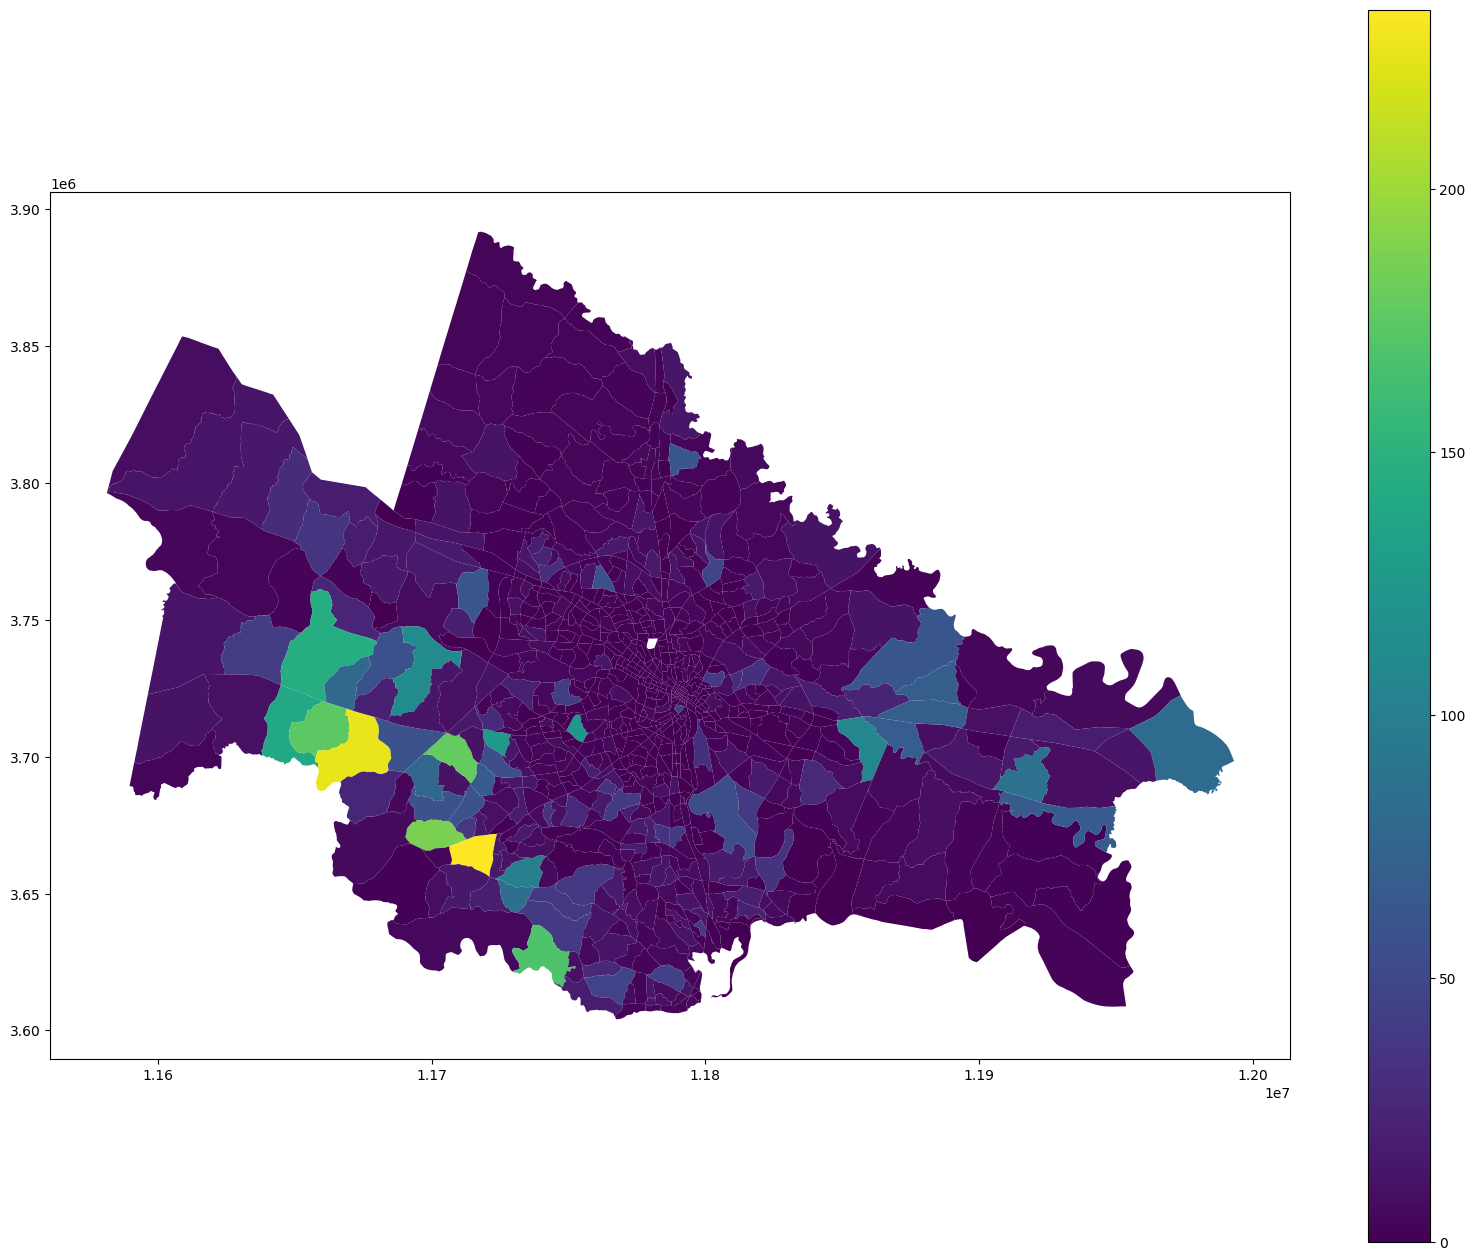

In [57]:
fig, ax = plt.subplots(figsize = (20,16))
Scn_Output.plot(column = "Scn_TOT_POP", legend=True,ax=ax)

C:\Users\rsingh\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

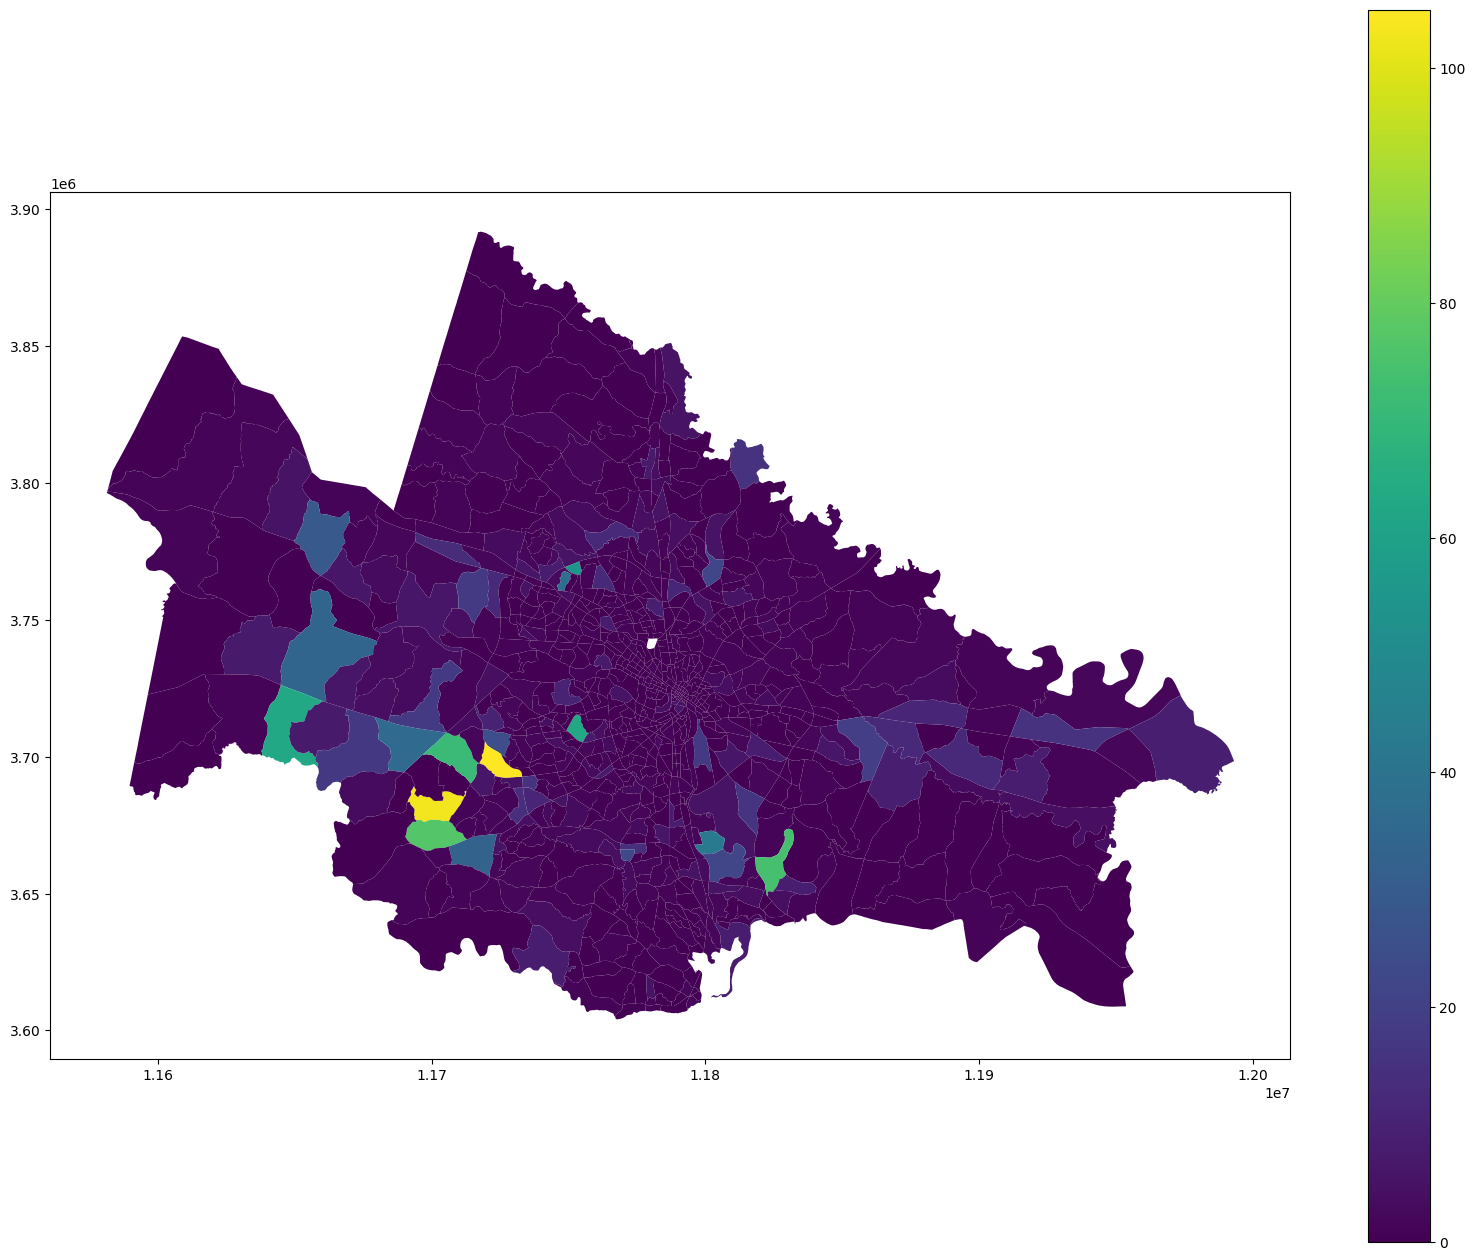

In [58]:
fig, ax = plt.subplots(figsize = (20,16))
Scn_Output.plot(column = "Scn_TOT_EMP", legend=True,ax=ax)

C:\Users\rsingh\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

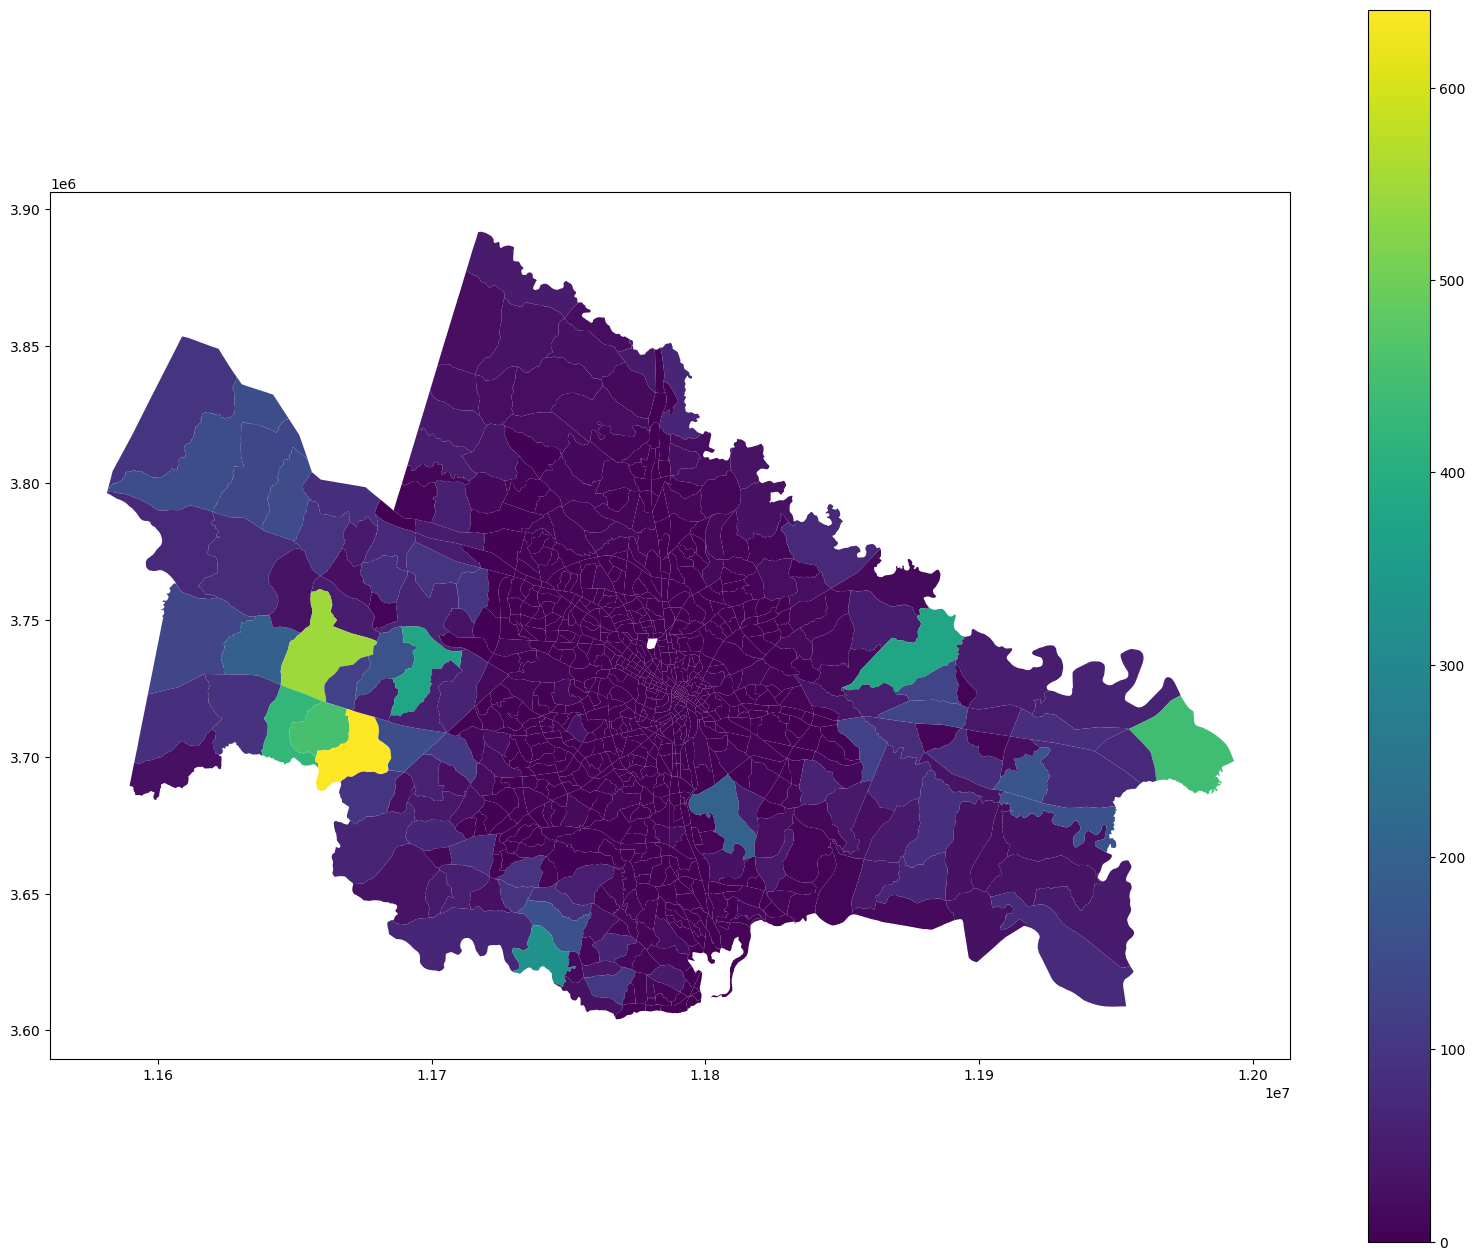

In [59]:
fig, ax = plt.subplots(figsize = (20,16))
Scn_Output.plot(column = "Future_Summ_Area", legend=True,ax=ax)

C:\Users\rsingh\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

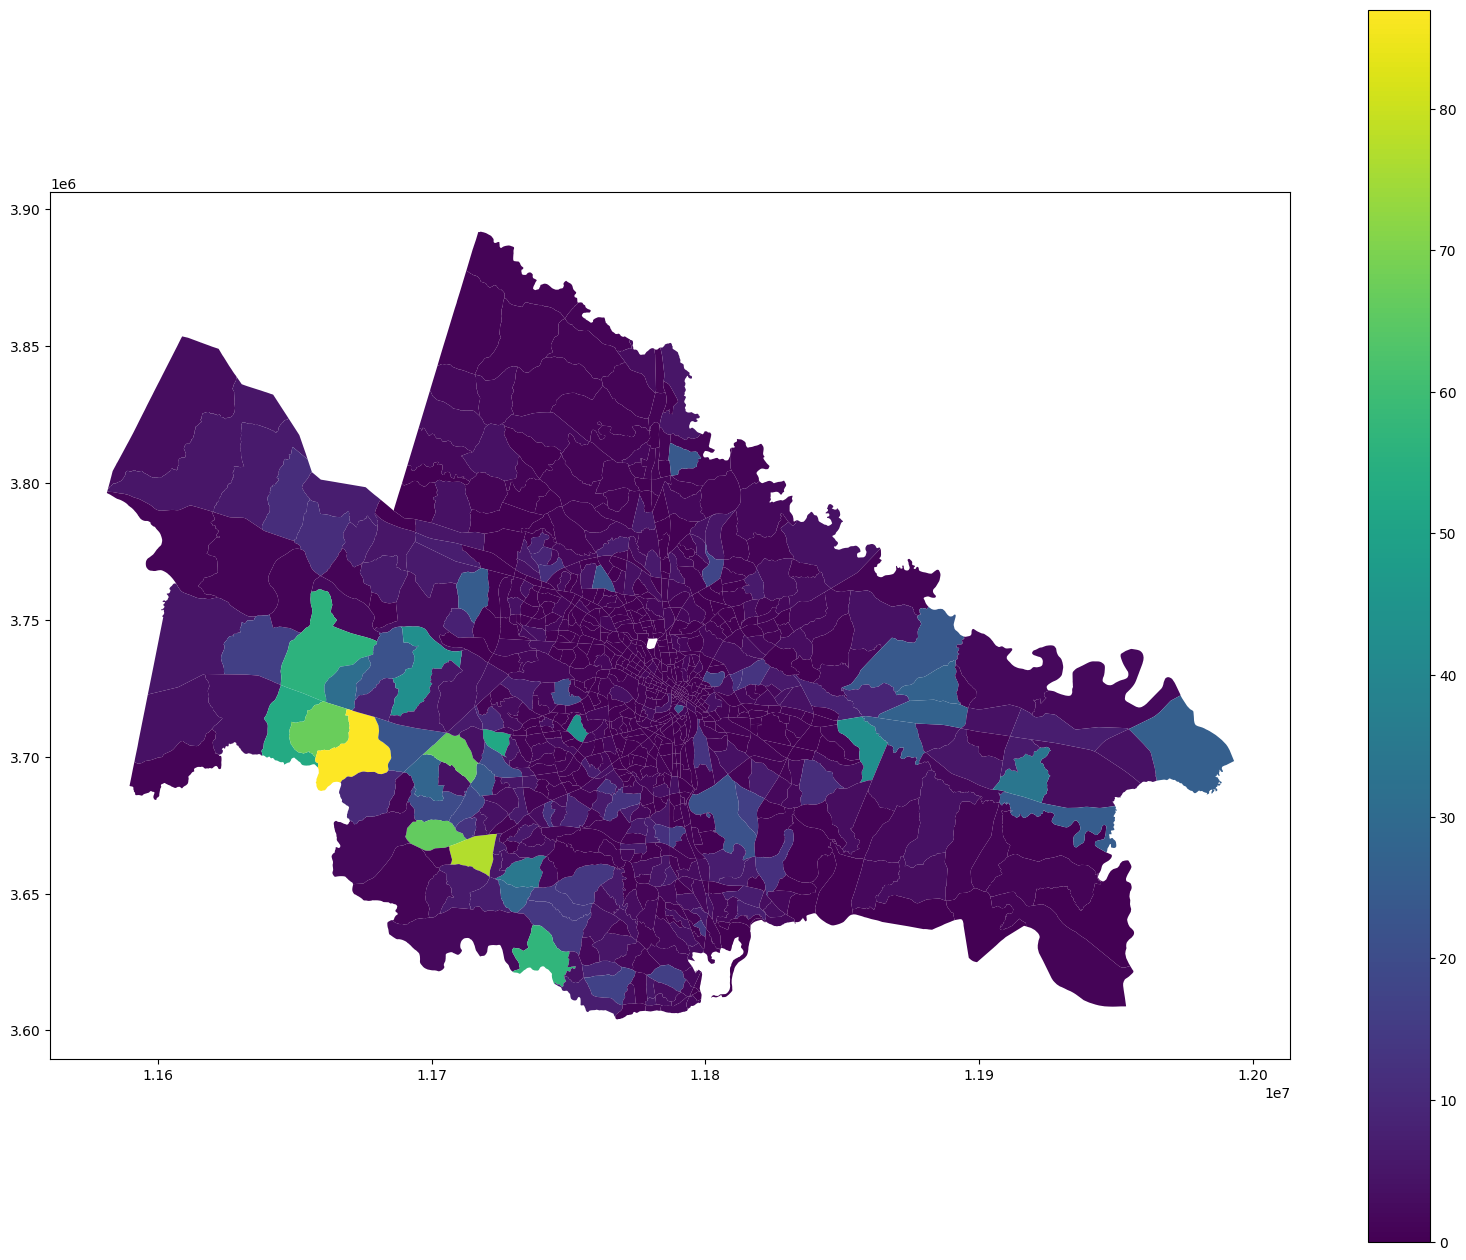

In [60]:
fig, ax = plt.subplots(figsize = (20,16))
Scn_Output.plot(column = "Scn_HH", legend=True,ax=ax)